<a href="https://colab.research.google.com/github/moomonkey/tf_lab/blob/master/Fashion_mnist_2_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denna kod använder Tensorflow, keras, med Fashion-mnist som databas

# Denna kod är baserad på dokumentation i Francois Chollets "Deep learning with Python", tensorflow API, docs, och tutorials: https://www.tensorflow.org/tutorials/keras/basic_classification och Keras dokumentation, https://keras.io/examples/mnist_cnn/. Visualisering är inkluderad för att verifiera koden.

# Imports

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importera dataset Fashion-mnist, vilket har 10 kategorier, i träningsdata, träningslabel för att träna modellen, testdata och testlabels för att testa modellen

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Se träningsdata och testdata

In [6]:
print("Träningsbilder: ", train_img.shape, "Träningsetiketter: ", train_labels.shape) #består av 60000 exempel i 28*28 pixelformat
#Se test data
print("Testbilder: ", test_img.shape, "Testetiketter: ", test_labels.shape) #består av 10000 exempel i 28*28 format
#Skapa etiketter
fashion_cat = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Boot']

Träningsbilder:  (60000, 28, 28) Träningsetiketter:  (60000,)
Testbilder:  (10000, 28, 28) Testetiketter:  (10000,)


#Förbered datan och normalisera. Encode etiketter

In [7]:
import pandas as pd
train_img = train_img.reshape(-1,28,28,1)
print(train_img.shape)
test_img = test_img.reshape(-1,28,28,1)
print(test_img.shape)
#Ändra typ till fl32
train_img = train_img.astype('float32') / 255 #Normalisera pixeldimension från 0-255 till 0-1
test_img = test_img.astype('float32') / 255
#Encode etiketter
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape) #se output
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


Using TensorFlow backend.


In [8]:
model = tf.keras.Sequential()
#Lager ett med Conv2D (32 channels, 3X3 filter), Maxpooling. Använder padding och Dropout(0.3)
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#storlek på poolingfönster
model.add(tf.keras.layers.Dropout(0.3))
#lager två med Conv2D (64 channels, 3X3 filter), Maxpooling. Använder padding och Dropout (0.3)
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
#Flatten och classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.3)) # lade till dropout för att regulera overfit
model.add(tf.keras.layers.Dense(100, activation='relu')) #Dense är 100 neurons "fully connected"
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))#probabilty score (10 neurons) till kategorierna

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________

# Kompilera modellen

In [0]:

model.compile(optimizer='adam',#stochastic gradient decent, fungerade bättre än 'rmsprop'
              loss='categorical_crossentropy', #loss funktion categorical (inte sparse_categorical_crossentropy labels får inte plats)
              metrics=['accuracy'])

# Training model med 20 epoch

In [10]:
history = model.fit(train_img, train_labels, epochs=20) #20 epochs

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.4951 - acc: 0.8190
Epoch 2/20
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.3424 - acc: 0.8751
Epoch 3/20
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.3039 - acc: 0.8881
Epoch 4/20
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2771 - acc: 0.8965
Epoch 5/20
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2610 - acc: 0.9021
Epoch 6/20
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2465 - acc: 0.9067
Epoch 7/20
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.2367 - acc: 0.9135
Epoch 8/20
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2252 - acc: 0.9141
Epoch 9/20
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2188 - acc: 0.9182
Epoch 10/20
60000/60000 [==============================] - 

# Använd test data på modellen för att jämföra med träningsdata

#Plot accuracy och loss av träningsdatan

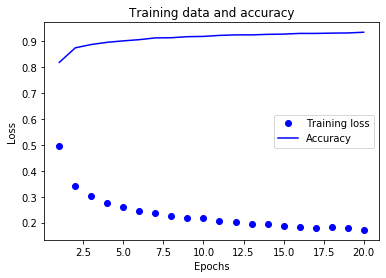

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Accuracy')
plt.title('Training data and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
history2 = model.fit(test_img, test_labels, epochs=20) 

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.2778 - acc: 0.9041
Epoch 2/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.2488 - acc: 0.9128
Epoch 3/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.2179 - acc: 0.9212
Epoch 4/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.2119 - acc: 0.9233
Epoch 5/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.2009 - acc: 0.9237
Epoch 6/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1982 - acc: 0.9280
Epoch 7/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1802 - acc: 0.9327
Epoch 8/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1748 - acc: 0.9343
Epoch 9/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.1678 - acc: 0.9364
Epoch 10/20
10000/10000 [==============================] - 

#Plot accuaracy och loss av testdatan

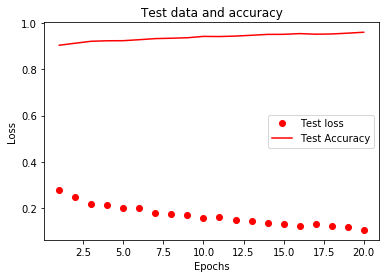

In [13]:
import matplotlib.pyplot as plt

history_dict = history2.history
test_loss_values = history_dict['loss']
test_acc_values = history_dict['acc']
epochs = range(1, len(test_acc_values) + 1)
plt.plot(epochs, test_loss_values, 'ro', label='Test loss')
plt.plot(epochs, test_acc_values, 'r', label='Test Accuracy')
plt.title('Test data and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluera och jämför training data med test data

In [14]:
train_loss, train_acc = model.evaluate(train_img, train_labels)
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTrain noggrannhet: ', round(train_acc*100, 2),'%')
print('\nTest noggrannhet: ', round(test_acc*100, 2),'%')

print('\nTrain loss: ', round(train_loss, 2),'%')
print('\nTest loss: ', round(test_loss, 2),'%')


10000/10000 [==============================] - 3s 314us/sample - loss: 0.0445 - acc: 0.9869

Train noggrannhet:  94.33 %

Test noggrannhet:  98.69 %

Train loss:  0.15 %

Test loss:  0.04 %
